#기존 모델과 성능 비교

- SMOTE, CTGAN, TVAE, CTABGAN과 제안 기법 비교
-CTABGAN은 https://github.com/Team-TUD/CTAB-GAN 코드로 실험
- 기존 모델과 성능 비교 막대 그래프 시각화

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

%cd /content/gdrive/My Drive/Colab Notebooks/BAMT-GAN/evaluation/

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/BAMT-GAN/evaluation


##import

In [2]:
!pip uninstall numpy
!pip install numpy==1.22
!pip install ctgan

Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.22.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.22.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 54.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires numpy!=1.22.0,

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tens

In [3]:
!pip install 'sktime>=0.4,<0.5' 'tsfresh<1,>=0.15'
!pip install sdv
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.8 MB/s eta 0:00:0

In [2]:
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import pandas as pd
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mlp

%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
import numpy as np
import pandas as pd
from ctgan import load_demo
from ctgan import CTGAN

from ctgan import load_demo
from sdv.single_table import TVAESynthesizer
from sdv.single_table import CopulaGANSynthesizer
from ctgan import CTGAN
from sdv.metadata import SingleTableMetadata

##기존 모델 코드

In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

def go_smote(df_path,target,sample_percent,file_name):
  # csv 파일에서 데이터 로드
  df = pd.read_csv(df_path)

  # 데이터와 레이블 분리
  X = df.drop(target, axis=1)  # target이 레이블에 해당하는 칼럼명이라고 가정
  y = df[target]

  # 각 클래스의 개수 확인
  class_counts = y.value_counts()

  # 원본 데이터의 40%만큼 증가시키기 위한 비율 계산
  sample_strategy = {class_name: int(count * sample_percent) for class_name, count in class_counts.items()}

  # SMOTE 적용
  smote = SMOTE(sampling_strategy=sample_strategy, random_state=42)
  X_res, y_res = smote.fit_resample(X, y)

  # 증강 데이터와 원본 데이터를 합치기 전에 레이블 y를 다시 붙여서 DataFrame 형태로 만듭니다.
  df_res = pd.DataFrame(X_res, columns=X.columns)
  df_res[target] = y_res

  # 최종 데이터 확인
  print(df_res.shape)
  df_res.to_csv('./diff_model/'+str(file_name)+'_smote'+str(sample_percent)+'.csv',index=False)
  new_ml_eval2(df_path,target)

In [5]:
def go_ctgan(df,d_col,sample,file_name):
  df = pd.read_csv(df)
  print(df)
  ctgan = CTGAN(epochs=150)
  ctgan.fit(df, d_col)


  synthetic_data = ctgan.sample(sample)
  return synthetic_data

In [6]:
def go_tvae(df,d_col,sample,file_name):
  data = pd.read_csv(df)
  metadata = SingleTableMetadata()
  metadata.detect_from_csv(filepath=df)
  synthesizer = TVAESynthesizer(metadata, epochs=500)
  synthesizer.fit(data)

  synthetic_data = synthesizer.sample(num_rows=sample)
  return synthetic_data

In [7]:
def go_copula(df,d_col,sample,file_name):
  data = pd.read_csv(df)
  metadata = SingleTableMetadata()
  metadata.detect_from_csv(filepath=df)
  synthesizer = CopulaGANSynthesizer(metadata,epochs=500)
  synthesizer.fit(data)

  synthetic_data = synthesizer.sample(num_rows=sample)
  return synthetic_data

In [8]:
def go_all_model(df, d_col, file_name, one_sample, two_sample):
    # Load the original data
    orig_df = pd.read_csv(df)
    orig_size = len(orig_df)

    # Function mapping
    func_dict = {
       'ctgan': go_ctgan,
        'tvae': go_tvae,
        'copula': go_copula
    }
    model_name = ['tvae', 'ctgan','copula']
    for name in model_name:
        for size in [one_sample, two_sample]:
            csv_name = f'{file_name}_{size}_{name}.csv'
            augment_size = abs(size - orig_size)
            # Augment the data
            augmented_df = func_dict[name](df, d_col, augment_size, csv_name)
            # Concatenate original and augmented data
            total_df = pd.concat([orig_df, augmented_df])
            # Save to CSV
            total_df.to_csv('./diff_model/'+csv_name, index=False)

    return total_df

In [ ]:
tox21_d_col = ['289', '208', '397', '304', '309','SR.ARE']

go_all_model('../data/tox21.csv',tox21_d_col,'tox21',10360,29600)
go_smote('../data/tox21.csv','SR.ARE',1.4,'tox21')
go_smote('../data//tox21.csv','SR.ARE',4.0,'tox21')

##기존 모델과 성능 비교 시각화

###RAW+기존 모델+BAMTGAN 성능 비교(RF) +200% Augmentation

In [ ]:
import pandas as pd

acc = [81,81,80,83,81,85]
auc = [75,74,71,75,74,85]
f1_score = [61,61,54,61,60,83]
model = ['RAW','SMOTE(2002)', 'CTGAN(2019)', 'TVAE(2019)','CTABGAN(2021)','BAMTGAN(2023)']
df = pd.DataFrame({'ACC' : acc, 'AUC' : auc, 'F1-score' : f1_score}, index = model)
df

,ACC,AUC,F1-score
RAW,81,75,61
SMOTE(2002),81,74,61
CTGAN(2019),80,71,54
TVAE(2019),83,75,61
CTABGAN(2021),81,74,60
BAMTGAN(2023),85,85,83


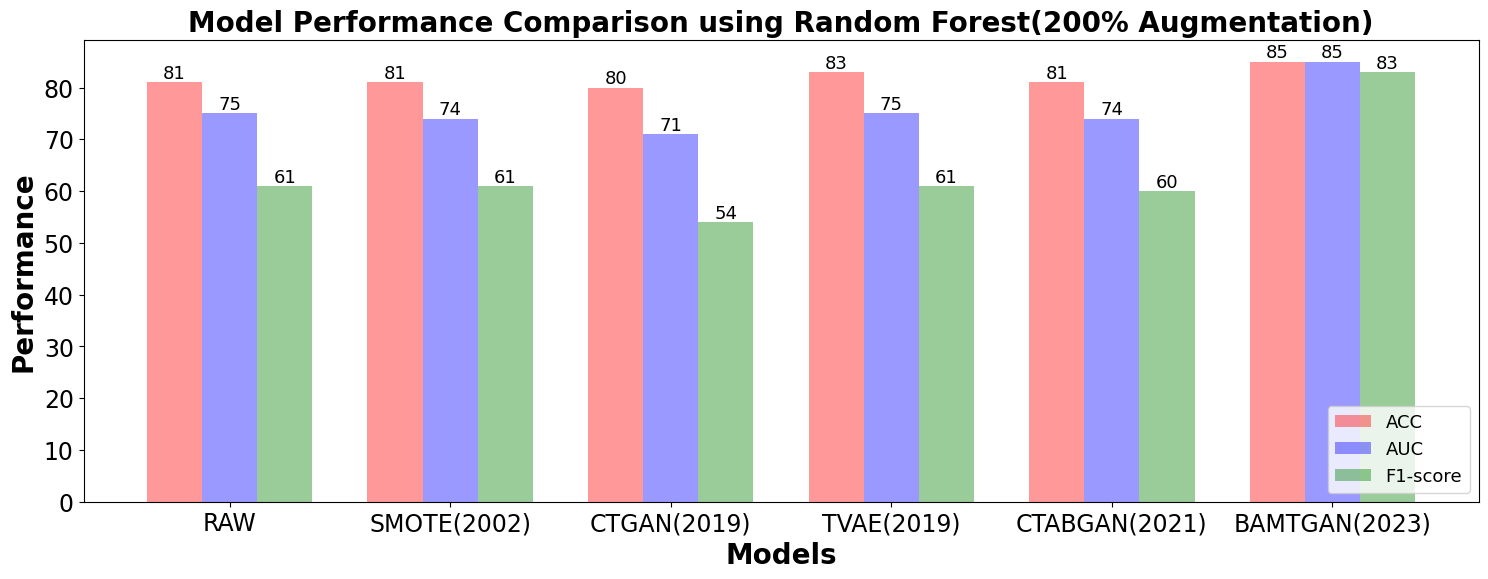

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
bar_width = 0.25

index = np.arange(6)

plt.rc('font', size=13)

b1 = plt.bar(index, df['ACC'], bar_width, alpha=0.4, color='red', label='ACC')

b2 = plt.bar(index + bar_width, df['AUC'], bar_width, alpha=0.4, color='blue', label='AUC')

b3 = plt.bar(index + 2 * bar_width, df['F1-score'], bar_width, alpha=0.4, color='green', label='F1-score')

# 각 막대에 대한 값을 표시
for b in [b1, b2, b3]:
    for rect in b:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height,
                '%d' % round(float(height)), ha='center', va='bottom')

plt.xticks(np.arange(bar_width, 6 + bar_width, 1), model)

plt.ylabel('Performance', size = 20,fontweight='bold')
plt.xlabel('Models', size = 20,fontweight='bold')
plt.title("Model Performance Comparison using Random Forest(200% Augmentation)",size=20,fontweight='bold')
plt.legend(loc='lower right')
plt.show()

###RAW+기존 모델+BAMTGAN 성능 비교(RF) +40% Augmentation

In [ ]:
import pandas as pd

acc = [81,81,76,82,81,86]
auc = [74,74,71,75,74,86]
f1_score = [61,61,58,62,61,86]
model = ['RAW','SMOTE(2002)', 'CTGAN(2019)', 'TVAE(2019)','CTABGAN(2021)','BAMTGAN(2023)']
df = pd.DataFrame({'ACC' : acc, 'AUC' : auc, 'F1-score' : f1_score}, index = model)
df

,ACC,AUC,F1-score
RAW,81,74,61
SMOTE(2002),81,74,61
CTGAN(2019),76,71,58
TVAE(2019),82,75,62
CTABGAN(2021),81,74,61
BAMTGAN(2023),86,86,86


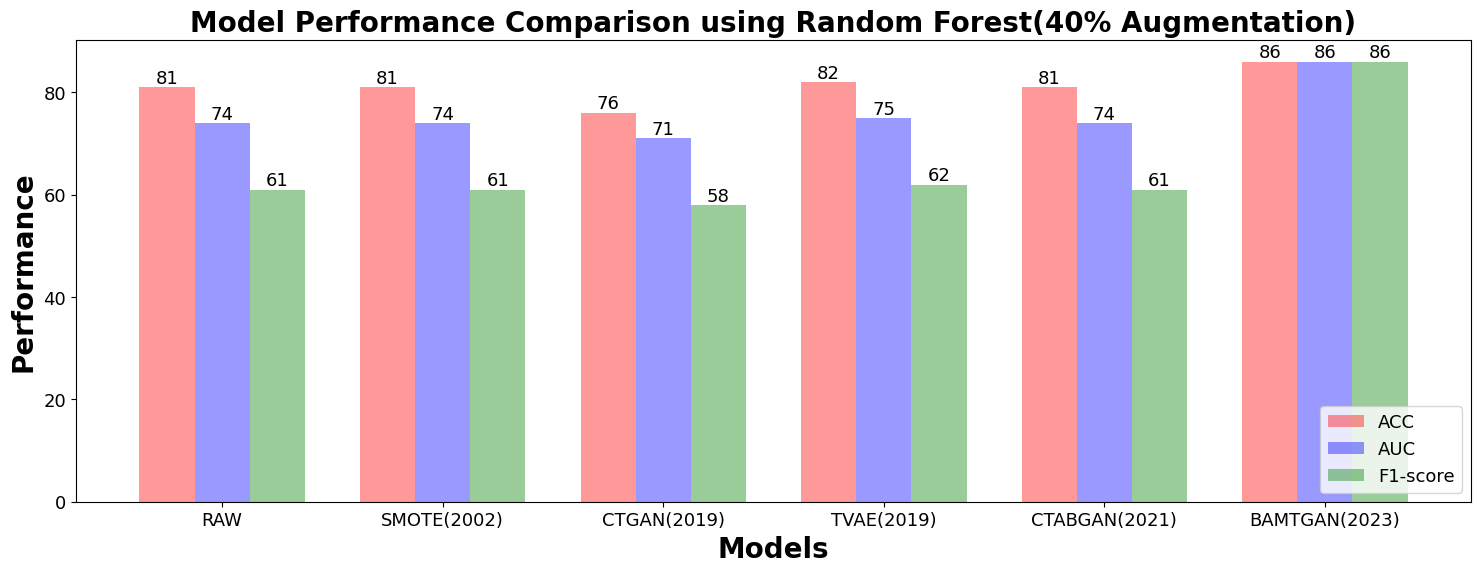

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
bar_width = 0.25

index = np.arange(6)

plt.rc('font', size=13)

b1 = plt.bar(index, df['ACC'], bar_width, alpha=0.4, color='red', label='ACC')

b2 = plt.bar(index + bar_width, df['AUC'], bar_width, alpha=0.4, color='blue', label='AUC')

b3 = plt.bar(index + 2 * bar_width, df['F1-score'], bar_width, alpha=0.4, color='green', label='F1-score')

# 각 막대에 대한 값을 표시
for b in [b1, b2, b3]:
    for rect in b:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height,
                '%d' % round(float(height)), ha='center', va='bottom')

plt.xticks(np.arange(bar_width, 6 + bar_width, 1), model)

plt.ylabel('Performance', size = 20,fontweight='bold')
plt.xlabel('Models', size = 20,fontweight='bold')
plt.title("Model Performance Comparison using Random Forest(40% Augmentation)",size=20,fontweight='bold')
plt.legend(loc='lower right')
plt.show()